<a href="https://colab.research.google.com/github/VIJAYARAGUL362/FLOOD-SEVERITY-PREDICTION-/blob/main/FLOOD_REGRESSION_DAMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING THE DATASET

In [ ]:
dataset = pd.read_csv("flood_dataset_regression.csv")
dataframe = pd.DataFrame(dataset)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   ISO             6237 non-null   object 
 2   Location        6237 non-null   object 
 3   Latitude        6237 non-null   float64
 4   Longitude       6237 non-null   float64
 5   Total Deaths    6237 non-null   float64
 6   Total Affected  6237 non-null   float64
 7   duration        6237 non-null   float64
 8   time            6237 non-null   int64  
 9   Rainfall        6237 non-null   float64
 10  Elevation       6237 non-null   float64
 11  Slope           6237 non-null   float64
 12  distance        6237 non-null   float64
 13  occured         6237 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 682.3+ KB


# DATA PREPROCESSING

In [ ]:
dataframe

,Disaster Type,ISO,Location,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,JAM,Saint james,52.671700,-0.299500,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.000000e+00,1
1,0,JPN,Tokyo,35.689700,139.692000,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.000000e+00,1
2,0,CHN,Beijing,39.905000,116.391000,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.000000e+00,1
3,0,CHN,Guangzhou,23.128800,113.259000,0.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.000000e+00,1
4,0,CHN,Tianjin,39.146700,117.206000,0.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,2,TJK,Safedkunda,38.980000,70.790000,1.0,145.0,0.0,2016,1662.272831,3654.0,39.448242,0.000000e+00,0
6233,2,TUR,Marmara region,40.588581,28.426908,0.0,236.0,0.0,2016,679.452475,0.0,0.000000,1.390229e+06,0
6234,2,ECU,Esmeraldas,-19.761311,-44.314594,0.0,3081.0,0.0,2016,1143.807451,758.0,5.892309,0.000000e+00,0
6235,4,SOM,Gedo,3.000000,42.000000,0.0,4400000.0,0.0,2016,591.941751,413.0,2.623307,0.000000e+00,0


In [ ]:
dataframe.loc[dataframe["Total Deaths"] == 0,'Total Deaths'] = dataframe['Total Affected']/10

In [ ]:
dataframe

,Disaster Type,ISO,Location,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,JAM,Saint james,52.671700,-0.299500,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.000000e+00,1
1,0,JPN,Tokyo,35.689700,139.692000,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.000000e+00,1
2,0,CHN,Beijing,39.905000,116.391000,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.000000e+00,1
3,0,CHN,Guangzhou,23.128800,113.259000,300000.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.000000e+00,1
4,0,CHN,Tianjin,39.146700,117.206000,63500.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,2,TJK,Safedkunda,38.980000,70.790000,1.0,145.0,0.0,2016,1662.272831,3654.0,39.448242,0.000000e+00,0
6233,2,TUR,Marmara region,40.588581,28.426908,23.6,236.0,0.0,2016,679.452475,0.0,0.000000,1.390229e+06,0
6234,2,ECU,Esmeraldas,-19.761311,-44.314594,308.1,3081.0,0.0,2016,1143.807451,758.0,5.892309,0.000000e+00,0
6235,4,SOM,Gedo,3.000000,42.000000,440000.0,4400000.0,0.0,2016,591.941751,413.0,2.623307,0.000000e+00,0


## DATA SELECTION

In [ ]:
X = dataframe.drop(['Disaster Type','ISO','Location','occured','Total Affected','Total Deaths'],axis = 1)
y = pd.DataFrame(dataframe['Total Deaths'],columns=["Total Deaths"])

In [ ]:
X

,Latitude,Longitude,duration,time,Rainfall,Elevation,Slope,distance
0,52.671700,-0.299500,0.0,1900,1383.125626,11.0,1.788207,0.000000e+00
1,35.689700,139.692000,0.0,1909,1383.125626,49.0,24.356508,0.000000e+00
2,39.905000,116.391000,0.0,1909,580.345856,55.0,8.374380,0.000000e+00
3,23.128800,113.259000,0.0,1912,2993.401777,7.0,12.917221,0.000000e+00
4,39.146700,117.206000,0.0,1913,1383.125626,3.0,1.513093,0.000000e+00
...,...,...,...,...,...,...,...,...
6232,38.980000,70.790000,0.0,2016,1662.272831,3654.0,39.448242,0.000000e+00
6233,40.588581,28.426908,0.0,2016,679.452475,0.0,0.000000,1.390229e+06
6234,-19.761311,-44.314594,0.0,2016,1143.807451,758.0,5.892309,0.000000e+00
6235,3.000000,42.000000,0.0,2016,591.941751,413.0,2.623307,0.000000e+00


In [ ]:
y

,Total Deaths
0,300.0
1,1379.0
2,100000.0
3,300000.0
4,63500.0
...,...
6232,1.0
6233,23.6
6234,308.1
6235,440000.0


## SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## REGRESSION PROBLEM

## SCALING THE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("scaler",StandardScaler(),['duration','time','Rainfall','Elevation','Slope','distance','Latitude','Longitude'])],remainder="passthrough")
scaled_X_train_array = ct.fit_transform(X_train)

In [ ]:
scaled_x_train = pd.DataFrame(scaled_X_train_array,columns=['duration','time','Rainfall','Elevation','Slope','distance','Latitude','Longitude'])

In [ ]:
scaled_x_train

,duration,time,Rainfall,Elevation,Slope,distance,Latitude,Longitude
0,-0.288836,-0.144665,-1.006683,-0.479449,-0.176689,-0.062979,0.406205,0.063619
1,-0.288836,0.629470,-0.045395,-0.710709,-0.635515,-0.062979,0.613259,1.241853
2,-0.288836,-0.241432,-1.016336,-0.197713,1.097349,-0.062979,-1.122685,1.097258
3,-0.288836,0.774620,0.201966,-0.657883,-0.645211,-0.062979,0.062084,0.790083
4,-0.288836,-2.515454,-1.016336,0.693281,-0.692516,-0.062979,0.838156,0.075358
...,...,...,...,...,...,...,...,...
4984,-0.288836,0.919770,0.849081,1.705186,1.783081,-0.062979,0.457152,0.705700
4985,-0.288836,0.000485,-0.605416,-0.360885,-0.692516,-0.062979,-0.279529,-0.365520
4986,-0.288836,0.048868,-0.887605,-0.710709,-0.795036,-0.059985,-1.534506,-1.306211
4987,2.463792,0.194019,-0.128722,-0.703665,-0.557647,-0.062979,0.533970,1.261255


In [ ]:
scaled_x_test_array = ct.transform(X_test)

In [ ]:
scaled_x_test = pd.DataFrame(scaled_x_test_array,columns=['duration','time','Rainfall','Elevation','Slope','distance','Latitude','Longitude'])

In [ ]:
# SCALING THE TARGET VARRIBLE
sc = StandardScaler()
scaled_y_train_array = sc.fit_transform(y_train)
scaled_y_train = pd.DataFrame(scaled_y_train_array,columns=["Total Death"])

In [ ]:
scaled_y_train

,Total Death
0,-0.047893
1,-0.047876
2,-0.046330
3,-0.047866
4,-0.047883
...,...
4984,-0.047788
4985,-0.043553
4986,-0.047906
4987,-0.047403


In [ ]:
scaled_y_test_array = sc.transform(y_test)
scaled_y_test = pd.DataFrame(scaled_y_test_array,columns=["Total Death"])

## CLASSIFICATION PROBLEM

In [ ]:
y_train

,Total Deaths
1025,7.0
2977,15.0
5001,750.1
3318,20.0
4405,12.0
...,...
3772,57.0
5191,2070.0
5226,1.0
5390,240.0


In [ ]:
y_train.loc[y_train['Total Deaths']<500,'Total Deaths'] = 0
y_train.loc[(y_train['Total Deaths']>=500) & (y_train['Total Deaths']<=1500),'Total Deaths'] = 1
y_train.loc[y_train['Total Deaths']>1500,'Total Deaths'] = 2

In [ ]:
y_train.value_counts()

,count
Total Deaths,
0.0,4148
2.0,547
1.0,294


In [ ]:
y_test.loc[y_test['Total Deaths']<500,'Total Deaths'] = 0
y_test.loc[(y_test['Total Deaths']>=500) & (y_test['Total Deaths']<=1500),'Total Deaths'] = 1
y_test.loc[y_test['Total Deaths']>1500,'Total Deaths'] = 2

In [ ]:
y_test.value_counts()

,count
Total Deaths,
0.0,1030
2.0,138
1.0,80


## DATA ENGINEERING (OVERSAMPLING)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import ADASYN
am = ADASYN(random_state=42)

In [ ]:
X_sm_train,y_sm_train = am.fit_resample(X_train,y_train)

In [ ]:
X_sm_train.shape,y_sm_train.shape

((12473, 8), (12473, 1))

# CREATING AND TRAINING THE MODEL

## DEEP LEARNING

### IMPORTING THE LIBRARIES

In [ ]:
import torch
from torch import nn

### DEVICE AGNOSTIC CODE

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [ ]:
device

'cpu'

### MOVING THE DATSET TO CUDA

In [ ]:
X_train = torch.tensor(X_sm_train.values,dtype=torch.float).to(device)
X_test = torch.tensor(X_test.values,dtype=torch.float).to(device)

y_train = torch.tensor(y_sm_train.values,dtype=torch.float).to(device)
y_test = torch.tensor(y_test.values,dtype=torch.float).to(device)

### MODEL ARCHIETECTURE

In [ ]:
class regression_model(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self,x):
        return self.layer1(x)

In [ ]:
# INSTANCE OF THE CLASS
model1 = regression_model()
model1.to(device)

regression_model(
  (layer1): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=256, out_features=128, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=128, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=64, out_features=1, b

### OPTIMIZER AND LOSS FUNCTION

In [ ]:
optim = torch.optim.Adam(params = model1.parameters(),lr=0.01)
loss = nn.L1Loss()

### TRAINING THE MODEL

In [ ]:
epochs = 1000

training_loss = []
testing_loss = []
epochs_list = []

for epoch in range(epochs):

    # TRAINING MODE
    model1.train()

    # GIVING INPUT TO THE MODEL
    y_pred = model1(X_train)
    train_loss = loss(y_pred,y_train)

    # OPTIMIZER ZERO GRAD
    optim.zero_grad()

    # BACK PROPAGATION
    train_loss.backward()

    # GRADIENT DESCENT
    optim.step()

    # EVALUATING THE MODEL
    with torch.inference_mode():
        model1.eval()
        y_test_pred = model1(X_test)
        test_loss = loss(y_test_pred,y_test)

        if epoch%100 == 0:
             training_loss.append(train_loss)
             testing_loss.append(test_loss)
             epochs_list.append(epoch)
             print(f"Epoch is {epoch}, Training loss is {train_loss} and the test loss is {test_loss}")


Epoch is 0, Training loss is 0.909206211566925 and the test loss is 1.2463704347610474
Epoch is 100, Training loss is 0.6667860150337219 and the test loss is 0.8994462490081787
Epoch is 200, Training loss is 0.6469805836677551 and the test loss is 0.876350998878479
Epoch is 300, Training loss is 0.604810357093811 and the test loss is 0.41119423508644104


KeyboardInterrupt: 

### VISUALIZING THE PERFORMANCE

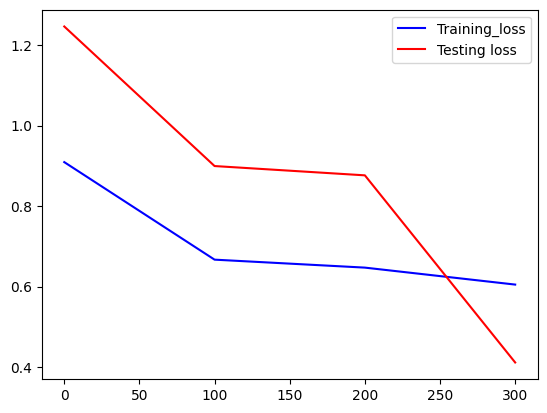

In [ ]:
plt.plot(epochs_list,torch.tensor(training_loss).numpy(),c="b",label="Training_loss")
plt.plot(epochs_list,torch.tensor(testing_loss).numpy(),c="r",label="Testing loss")
plt.legend()
plt.show()

## TROUBLE SHOOTING

### MOVING THE SCALED DATSET TO THE CUDA AND SPLITING IT

In [ ]:
scaled_x_train = torch.tensor(scaled_x_train.values,dtype=torch.float).to(device)
scaled_x_test = torch.tensor(scaled_x_test.values,dtype=torch.float).to(device)

scaled_y_train = torch.tensor(scaled_y_train.values,dtype=torch.float).to(device)
scaled_y_test = torch.tensor(scaled_y_test.values,dtype=torch.float).to(device)

In [ ]:
scaled_x_train

tensor([[-0.2888, -0.1447, -1.0067,  ..., -0.0630,  0.4062,  0.0636],
        [-0.2888,  0.6295, -0.0454,  ..., -0.0630,  0.6133,  1.2419],
        [-0.2888, -0.2414, -1.0163,  ..., -0.0630, -1.1227,  1.0973],
        ...,
        [-0.2888,  0.0489, -0.8876,  ..., -0.0600, -1.5345, -1.3062],
        [ 2.4638,  0.1940, -0.1287,  ..., -0.0630,  0.5340,  1.2613],
        [-0.2888, -0.2414,  0.1526,  ..., -0.0630,  1.1027, -0.3121]])

In [ ]:
# CREATING THE INSTANCE OF THE SECOND MODEL
model2 = regression_model()
model2.to(device)

regression_model(
  (layer1): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=256, out_features=128, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=128, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=64, out_features=1, b

### TRAINING THE MODEL

In [ ]:
epochs = 1000

training_loss = []
testing_loss = []
epochs_list = []

for epoch in range(epochs):

    # TRAINING MODE
    model2.train()

    # GIVING INPUT TO THE MODEL
    y_pred = model1(scaled_x_train)
    train_loss = loss(y_pred.squeeze(),scaled_y_train.squeeze())

    # OPTIMIZER ZERO GRAD
    optim.zero_grad()

    # BACK PROPAGATION
    train_loss.backward()

    # GRADIENT DESCENT
    optim.step()

    # EVALUATING THE MODEL
    with torch.inference_mode():
        model2.eval()
        y_test_pred = model1(scaled_x_test)
        test_loss = loss(y_test_pred.squeeze(),scaled_y_test.squeeze())

        if epoch%100 == 0:
             training_loss.append(train_loss)
             testing_loss.append(test_loss)
             epochs_list.append(epoch)
             print(f"Epoch is {epoch}, Training loss is {train_loss} and the test loss is {test_loss}")

Epoch is 0, Training loss is 1.0517644882202148 and the test loss is 0.6241622567176819
Epoch is 100, Training loss is 0.05220353975892067 and the test loss is 0.03667588531970978
Epoch is 200, Training loss is 0.04900514334440231 and the test loss is 0.028596296906471252
Epoch is 300, Training loss is 0.04923523589968681 and the test loss is 0.02923518233001232
Epoch is 400, Training loss is 0.048906393349170685 and the test loss is 0.029076309874653816
Epoch is 500, Training loss is 0.048737406730651855 and the test loss is 0.028943419456481934
Epoch is 600, Training loss is 0.04868482053279877 and the test loss is 0.028775058686733246


KeyboardInterrupt: 

# MAKING IT AS CLASSIFICATION MODEL

In [ ]:
class classification_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
    nn.Linear(8, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(p=0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.BatchNorm1d(32),
    nn.Dropout(p=0.2),
    nn.Linear(32, 3)
)


    def forward(self,x):
        return self.layer1(x)

In [ ]:
# CREATING THE INSTANCE OF THE MODEL
model3 = classification_model()
model3.to(device)

classification_model(
  (layer1): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:
# OPTIMIZER AND LOSS FUNCTION
optim = torch.optim.Adam(params = model3.parameters(),lr=0.01)
class_weights = torch.tensor([1.0/1030, 1.0/80, 1.0/138],dtype=torch.float,device=device)
loss = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
# TRAINING THE MODEL
epochs = 1000
softmax = nn.Softmax(dim=1)

training_loss = []
testing_loss = []
epochs_list = []

for epoch in range(epochs):

    # TRAINING MODE
    model3.train()

    # GIVING INPUT TO THE MODEL
    y_pred = model3(X_train)
    train_loss = loss(y_pred,y_train.squeeze().long())

    # OPTIMIZER ZERO GRAD
    optim.zero_grad()

    # BACK PROPAGATION
    train_loss.backward()

    # GRADIENT DESCENT
    optim.step()

    # EVALUATING THE MODEL
    with torch.inference_mode():
        model3.eval()
        y_test_pred = model3(X_test)
        test_loss = loss(y_test_pred,y_test.squeeze().long())

        if epoch%100 == 0:
             training_loss.append(train_loss)
             testing_loss.append(test_loss)
             epochs_list.append(epoch)
             print(f"Epoch is {epoch}, Training loss is {train_loss} and the test loss is {test_loss}")

Epoch is 0, Training loss is 1.1202781200408936 and the test loss is 1.189838171005249
Epoch is 100, Training loss is 0.7193082571029663 and the test loss is 1.2235881090164185
Epoch is 200, Training loss is 0.6628236770629883 and the test loss is 1.3044602870941162
Epoch is 300, Training loss is 0.6266484260559082 and the test loss is 1.395279049873352
Epoch is 400, Training loss is 0.6109817624092102 and the test loss is 1.3655177354812622
Epoch is 500, Training loss is 0.6024734973907471 and the test loss is 1.4475476741790771
Epoch is 600, Training loss is 0.5901895761489868 and the test loss is 1.416475534439087
Epoch is 700, Training loss is 0.5774847269058228 and the test loss is 1.5277987718582153
Epoch is 800, Training loss is 0.5755136013031006 and the test loss is 1.5425591468811035
Epoch is 900, Training loss is 0.57802814245224 and the test loss is 1.5565295219421387


In [ ]:
y_train.shape

torch.Size([12473, 1])

In [ ]:
with torch.inference_mode():
    y_pred_logits = model3(X_test)
    y_pred_prob = softmax(y_pred_logits)
    y_pred = torch.argmax(y_pred_prob,dim=1)

## EVALUATING THE PERFORMANCE

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [ ]:
report = classification_report(y_pred=y_pred.cpu().numpy(),y_true=y_test.cpu().numpy())

In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.09      0.16      1030\n         1.0       0.08      0.64      0.14        80\n         2.0       0.13      0.50      0.21       138\n\n    accuracy                           0.17      1248\n   macro avg       0.40      0.41      0.17      1248\nweighted avg       0.83      0.17      0.16      1248\n'

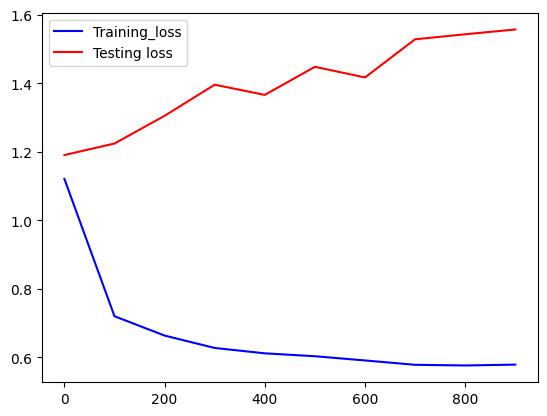

In [ ]:
plt.plot(epochs_list,torch.tensor(training_loss).numpy(),c="b",label="Training_loss")
plt.plot(epochs_list,torch.tensor(testing_loss).numpy(),c="r",label="Testing loss")
plt.legend()
plt.show()

# USING XGBOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=[1.0, 1030/80, 1030/138])  # Adjust for imbalance
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xg = model.predict(X_test)

In [ ]:
report_xg = classification_report(y_test,y_pred_xg)

In [ ]:
report_xg

'              precision    recall  f1-score   support\n\n         0.0       0.86      0.78      0.82      1030\n         1.0       0.18      0.28      0.21        80\n         2.0       0.21      0.29      0.24       138\n\n    accuracy                           0.69      1248\n   macro avg       0.41      0.45      0.42      1248\nweighted avg       0.75      0.69      0.72      1248\n'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'reg_lambda': uniform(0, 10),
    'reg_alpha': uniform(0, 10)
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': np.float64(0.9683240759278536), 'gamma': np.float64(0.19593163337823127), 'learning_rate': np.float64(0.13120434919751783), 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 213, 'reg_alpha': np.float64(1.7743954377972282), 'reg_lambda': np.float64(7.506147516408584), 'subsample': np.float64(0.9034173696336321)}
Best Score: 0.7304605559356582


In [ ]:
X_train.shape

torch.Size([12473, 8])

In [ ]:
y_pred_xg = random_search.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_xg)

array([[799,  80, 151],
       [ 44,  24,  12],
       [ 78,  18,  42]])

In [ ]:
report = classification_report(y_test,y_pred_xg)

In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.87      0.78      0.82      1030\n         1.0       0.20      0.30      0.24        80\n         2.0       0.20      0.30      0.24       138\n\n    accuracy                           0.69      1248\n   macro avg       0.42      0.46      0.43      1248\nweighted avg       0.75      0.69      0.72      1248\n'

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight

best_params = {
    'colsample_bytree': 0.9683240759278536,
    'gamma': 0.19593163337823127,
    'learning_rate': 0.13120434919751783,
    'max_depth': 7,
    'min_child_weight': 9,
    'n_estimators': 213,
    'reg_alpha': 1.7743954377972282,
    'reg_lambda': 7.506147516408584,
    'subsample': 0.9034173696336321,
    'objective': 'multi:softmax',
    'num_class': 3,  # 3 classes (0.0, 1.0, 2.0)
    'eval_metric': 'mlogloss',
    'random_state': 42
}

final_model = XGBClassifier(**best_params)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
final_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    verbose=False
)
y_pred = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Macro F1:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6875
Test Macro F1: 0.4228563011819797

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.77      0.82      1030
         1.0       0.20      0.28      0.23        80
         2.0       0.18      0.28      0.22       138

    accuracy                           0.69      1248
   macro avg       0.41      0.44      0.42      1248
weighted avg       0.74      0.69      0.71      1248



## TRAINING ON WHOLE DATASET

In [ ]:
y.loc[y['Total Deaths']<500,'Total Deaths'] = 0
y.loc[(y['Total Deaths']>=500) & (y['Total Deaths']<=1500),'Total Deaths'] = 1
y.loc[y['Total Deaths']>1500,'Total Deaths'] = 2

In [ ]:
y

,Total Deaths
0,0.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
6232,0.0
6233,0.0
6234,0.0
6235,2.0


In [ ]:
from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state=42)

In [ ]:
new_X,new_y = SM.fit_resample(X,y)

In [ ]:
new_X

,Latitude,Longitude,duration,time,Rainfall,Elevation,Slope,distance
0,52.671700,-0.299500,0.0,1900,1383.125626,11.000000,1.788207,0.0
1,35.689700,139.692000,0.0,1909,1383.125626,49.000000,24.356508,0.0
2,39.905000,116.391000,0.0,1909,580.345856,55.000000,8.374380,0.0
3,23.128800,113.259000,0.0,1912,2993.401777,7.000000,12.917221,0.0
4,39.146700,117.206000,0.0,1913,1383.125626,3.000000,1.513093,0.0
...,...,...,...,...,...,...,...,...
15529,23.093429,-58.942061,0.0,1979,1.868308,2219.683388,9.779434,0.0
15530,24.261207,-17.512104,0.0,2000,1236.950620,1058.802338,13.474251,0.0
15531,17.405453,91.156449,0.0,1978,1.868308,213.701260,1.869225,0.0
15532,11.877292,-0.576518,0.0,1997,519.687948,278.719380,4.124931,0.0


In [ ]:
new_y

,Total Deaths
0,0.0
1,1.0
2,2.0
3,2.0
4,2.0
...,...
15529,2.0
15530,2.0
15531,2.0
15532,2.0


In [ ]:
final_model.fit(new_X,new_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9683240759278536, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.19593163337823127, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13120434919751783,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=213, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
import joblib
joblib.dump(final_model,"/content/XGBoost_damage.pkl")

['/content/XGBoost_damage.pkl']

In [ ]:
new_flood_regreesion_damage = pd.concat([new_X,new_y],axis=1)

In [ ]:
new_flood_regreesion_damage.to_csv('flood_damage_prediction.csv',index=False)

In [ ]:
X_train,scaled_x_train

tensor([[ 28.2125,  30.9124,   0.0000,  ..., 197.0000,   5.5937,   0.0000],
        [ 33.0000, 120.0000,   0.0000,  ...,   0.0000,   1.4430,   0.0000],
        [ -7.1380, 109.0670,   0.0000,  ..., 437.0000,  17.1188,   0.0000],
        ...,
        [ 21.1517,  -0.5779,   0.0000,  ..., 243.1891,   1.4305,   0.0000],
        [ 12.0645,  -0.9505,   0.0000,  ..., 286.2392,   2.8778,   0.0000],
        [ 16.2097,  18.5369,   0.0000,  ..., 311.8606,   0.9274,   0.0000]])